In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file
file_path = '/content/drive/MyDrive/DATA245-Machine-Learning-Group(3)/ML_Project/email_job_scam_cleaned.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file_path)
df = df.drop(columns=['job_id'])

In [ ]:
df.head()

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,is_scam,non_https_links,id_info_requested,avg_days_offer,avg_urgent_terms,avg_bait_phrases
0,Marketing Intern,"US, NY, New York",Marketing,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0,0.0,0.0,30.824035,-0.100992,0.306755
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0.0,0.0,26.821787,5.957187,0.488798
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.0,1.0,27.440842,5.285345,0.890709
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.0,0.0,44.388317,1.017005,0.122852
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.0,0.0,20.342851,1.174334,0.245058


#1. Decision Tree

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
# Preprocessing
# Handle categorical variables - we'll treat all object/string columns as categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        # Fill missing values with 'Unknown' before encoding
        df[col] = df[col].fillna('Unknown')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Fill remaining numerical NA values with 0 (or you could use mean/median)
df = df.fillna(0)

# Define features and target
X = df.drop('is_scam', axis=1)
y = df['is_scam']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for interpretability
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree (might be large)
#plt.figure(figsize=(20,10))
#tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Scam', 'Scam'], filled=True, rounded=True, proportion=True)
#plt.title("Decision Tree for Job Scam Prediction")
#plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

#print("\nFeature Importance:")
#print(feature_importance)

cm_dt = confusion_matrix(y_test, y_pred)


Model Evaluation:
Accuracy: 0.9627143922445935

Confusion Matrix:
[[4962   37]
 [ 163  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.85      0.55      0.67       365

    accuracy                           0.96      5364
   macro avg       0.91      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364



#2. Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

#plt.figure(figsize=(8, 4))
#sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
#plt.title('Top 15 Important Features for Scam Detection')
#plt.tight_layout()
#plt.show()

cm_rf = confusion_matrix(y_test, y_pred)

Random Forest Model Evaluation:
Accuracy: 0.9670

Confusion Matrix:
[[4943   56]
 [ 121  244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4999
           1       0.81      0.67      0.73       365

    accuracy                           0.97      5364
   macro avg       0.89      0.83      0.86      5364
weighted avg       0.97      0.97      0.97      5364



#3. Naive Baye's

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

cm_nb = confusion_matrix(y_test, y_pred)

Confusion Matrix:
 [[4743  256]
 [ 135  230]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4999
           1       0.47      0.63      0.54       365

    accuracy                           0.93      5364
   macro avg       0.72      0.79      0.75      5364
weighted avg       0.94      0.93      0.93      5364


Accuracy Score: 0.9271066368381805


#4. Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_lr = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.87      0.51      0.64       365

    accuracy                           0.96      5364
   macro avg       0.92      0.75      0.81      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9614093959731543
Confusion Matrix:
 [[4971   28]
 [ 179  186]]


#5. RBF - SVM

In [ ]:

from sklearn.svm import SVC

svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf_model.fit(X_train_scaled, y_train)

y_pred = svm_rbf_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_rbf = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4999
           1       0.89      0.54      0.67       365

    accuracy                           0.96      5364
   macro avg       0.93      0.77      0.83      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9640193885160329
Confusion Matrix:
 [[4975   24]
 [ 169  196]]


#6. Linear SVM

In [ ]:
svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_linear_model.fit(X_train_scaled, y_train)

y_pred = svm_linear_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_linear = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4999
           1       0.86      0.50      0.63       365

    accuracy                           0.96      5364
   macro avg       0.91      0.75      0.80      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9602908277404921
Confusion Matrix:
 [[4969   30]
 [ 183  182]]


#7. Polynomial SVM

In [ ]:
svm_poly_model = SVC(kernel='poly', probability=True, random_state=42)
svm_poly_model.fit(X_train_scaled, y_train)

y_pred = svm_poly_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_svm_poly = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.88      0.54      0.67       365

    accuracy                           0.96      5364
   macro avg       0.92      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9632736763609246
Confusion Matrix:
 [[4971   28]
 [ 169  196]]


#8. kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # k is tunable
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm_knn = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.82      0.56      0.66       365

    accuracy                           0.96      5364
   macro avg       0.89      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy: 0.9614093959731543
Confusion Matrix:
 [[4953   46]
 [ 161  204]]


#9. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Use a simple decision tree as the base estimator (can tune depth)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost
ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Fit model
ada_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluation
print("AdaBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

cm_ada = confusion_matrix(y_test, y_pred_ada)

AdaBoost Evaluation:
Accuracy: 0.9618

Confusion Matrix:
[[4977   22]
 [ 183  182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4999
           1       0.89      0.50      0.64       365

    accuracy                           0.96      5364
   macro avg       0.93      0.75      0.81      5364
weighted avg       0.96      0.96      0.96      5364



#10. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Evaluation:
Accuracy: 0.9683072334079046

Confusion Matrix:
[[4966   33]
 [ 137  228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.87      0.62      0.73       365

    accuracy                           0.97      5364
   macro avg       0.92      0.81      0.86      5364
weighted avg       0.97      0.97      0.97      5364



#SHAP


Generating SHAP values for model: Decision Tree


<Figure size 640x480 with 0 Axes>

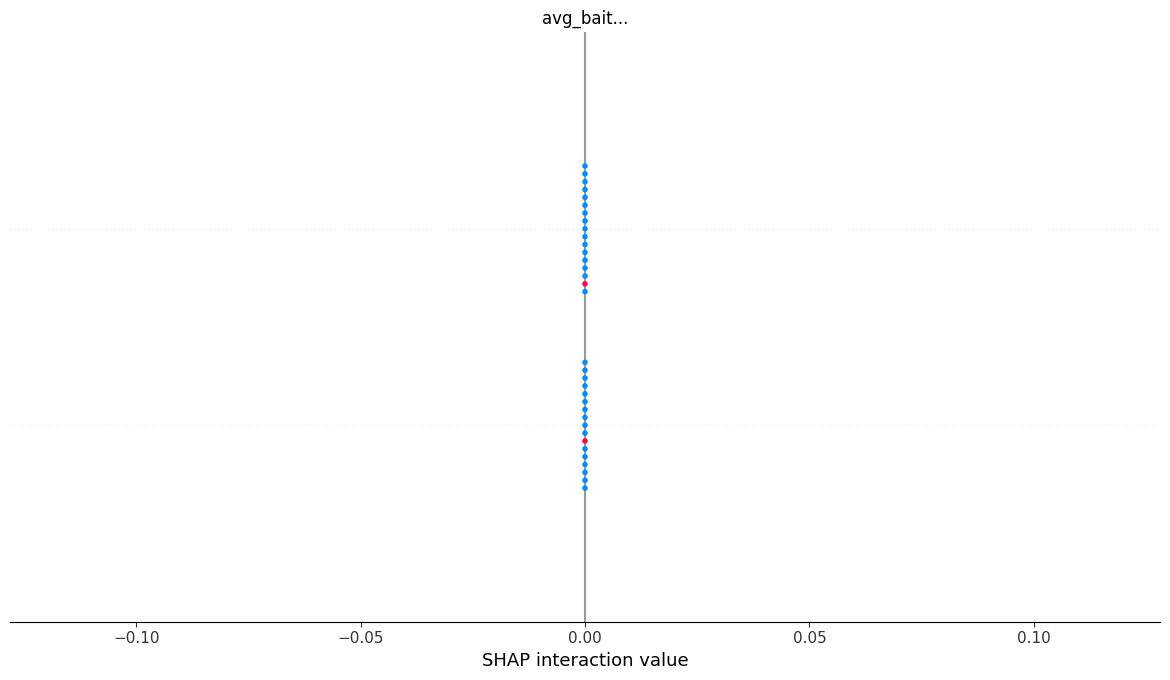


Generating SHAP values for model: Random Forest


<Figure size 640x480 with 0 Axes>

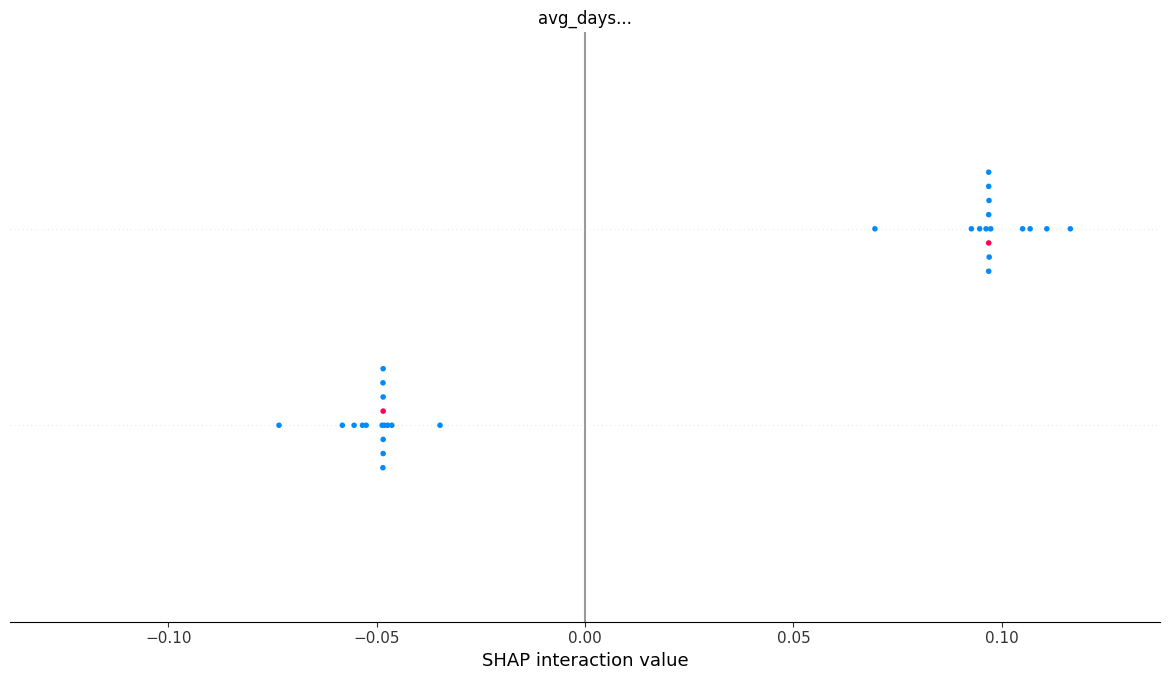


Generating SHAP values for model: Naive Bayes


  0%|          | 0/17 [00:00<?, ?it/s]

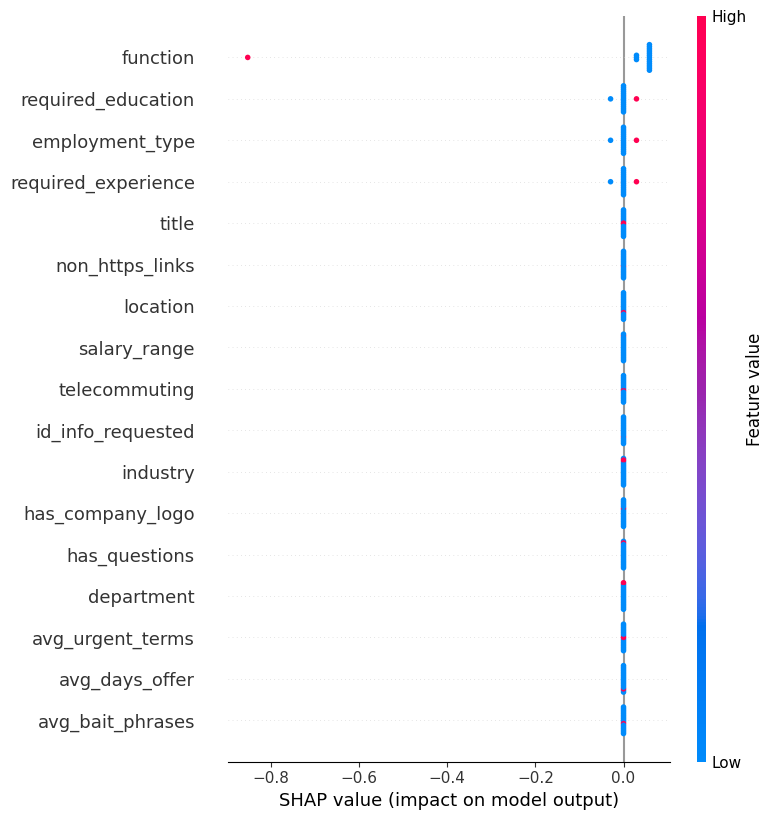


Generating SHAP values for model: Logistic Regression


  0%|          | 0/17 [00:00<?, ?it/s]

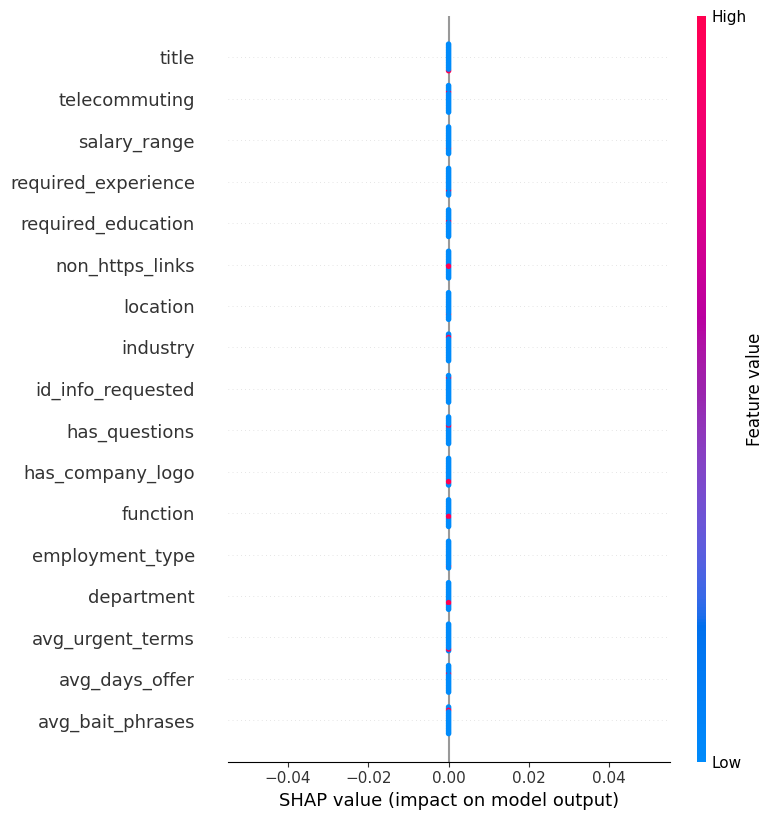


Generating SHAP values for model: SVM RBF


  0%|          | 0/17 [00:00<?, ?it/s]

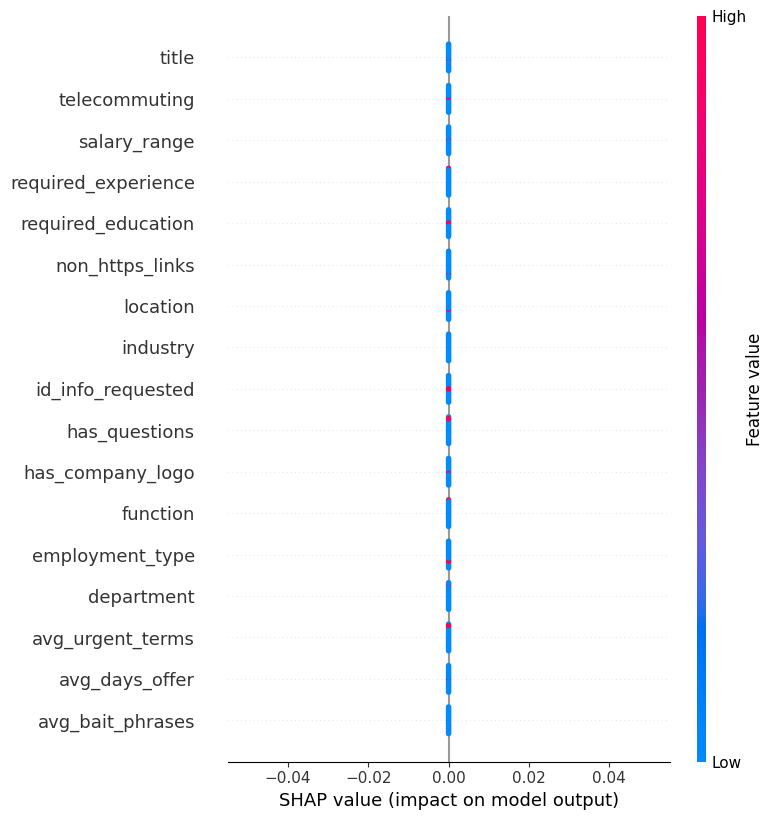


Generating SHAP values for model: SVM Linear


  0%|          | 0/17 [00:00<?, ?it/s]

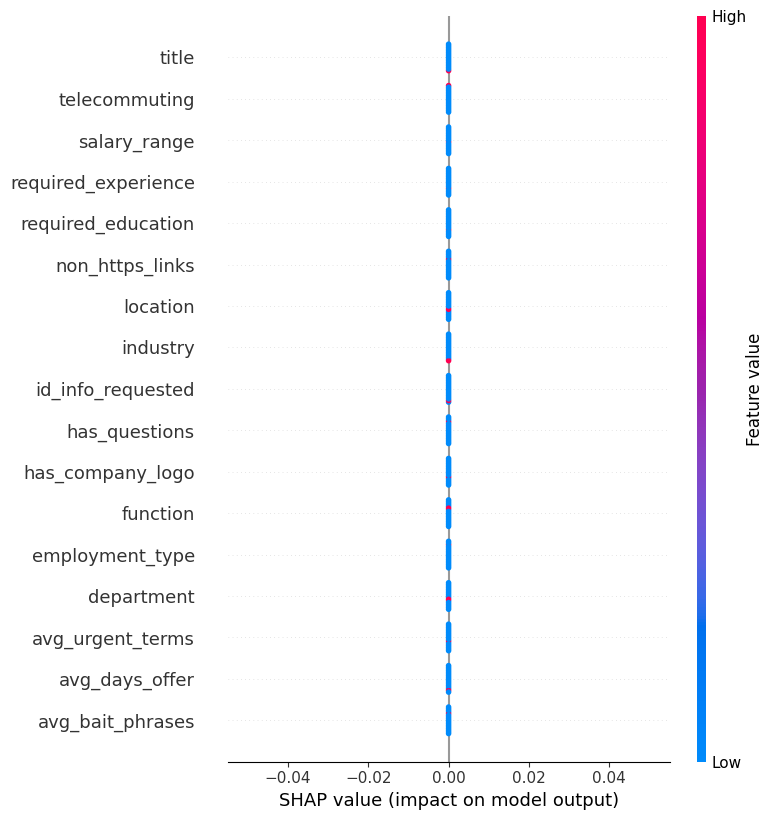


Generating SHAP values for model: SVM Poly


  0%|          | 0/17 [00:00<?, ?it/s]

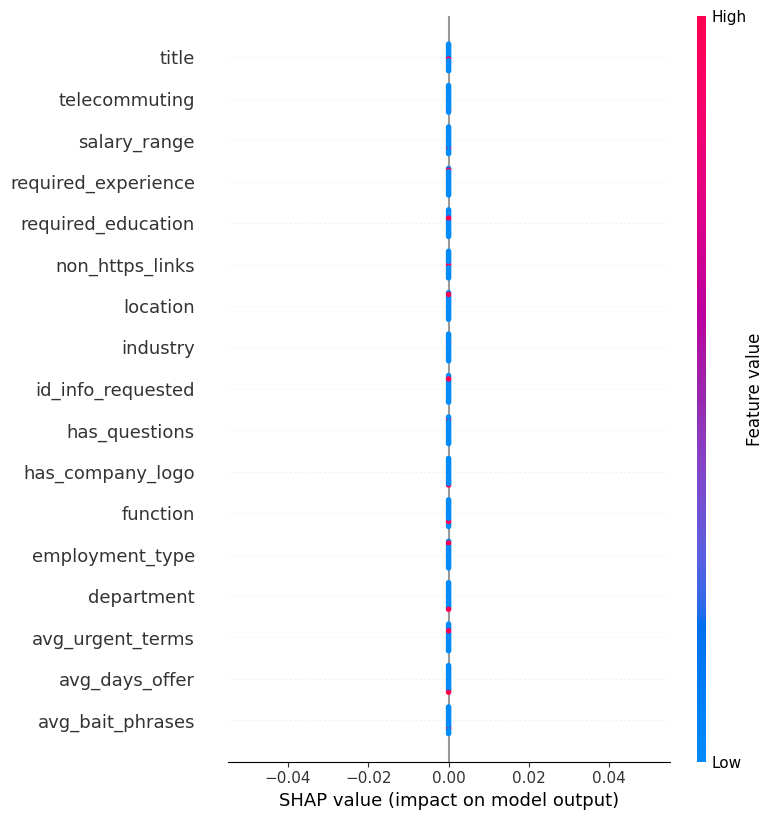


Generating SHAP values for model: KNN


  0%|          | 0/17 [00:00<?, ?it/s]

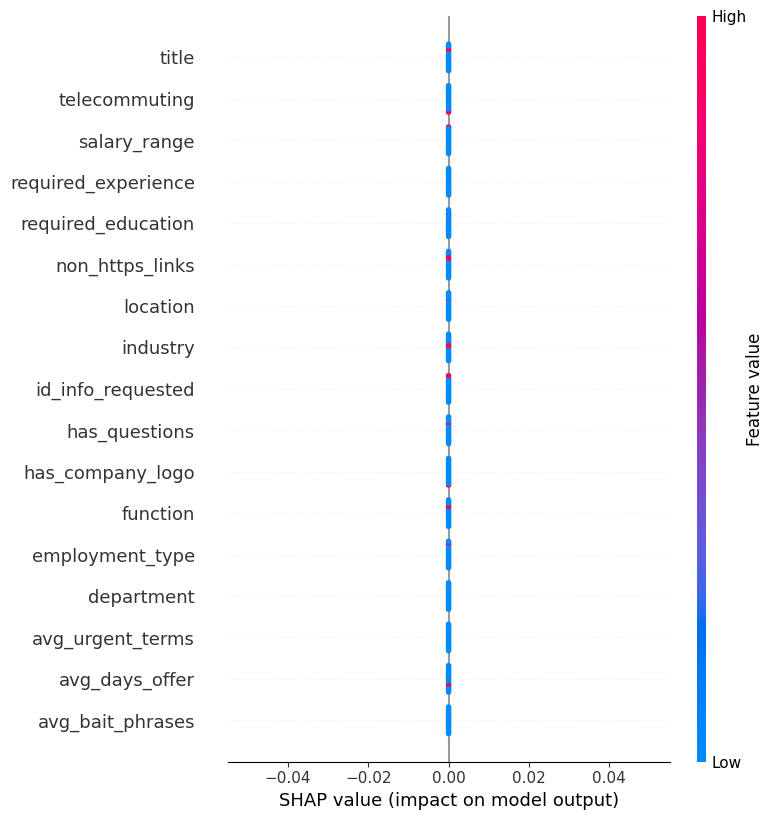


Generating SHAP values for model: AdaBoost


  0%|          | 0/17 [00:00<?, ?it/s]

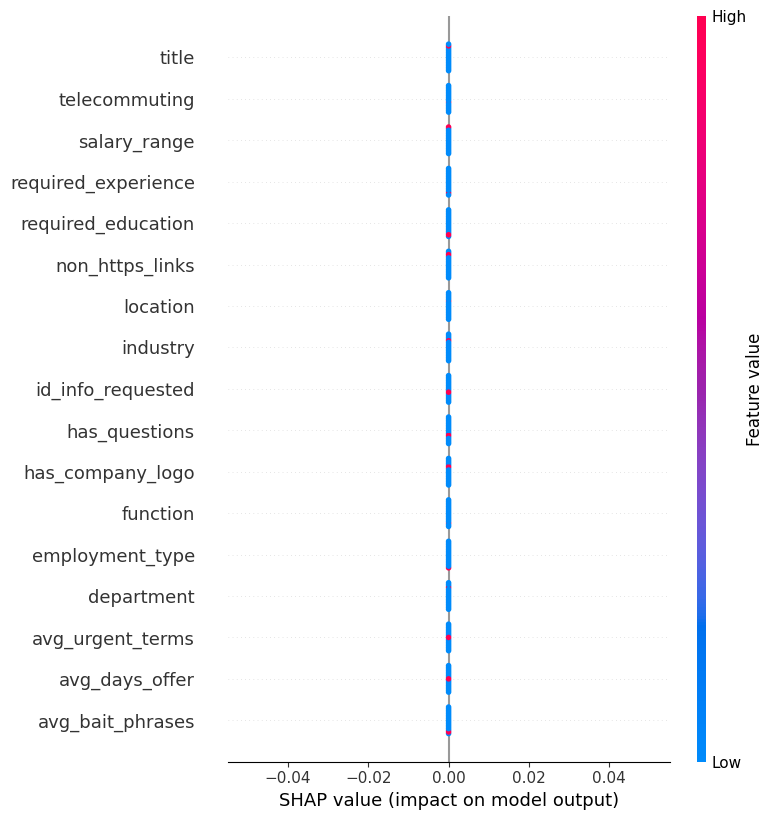


Generating SHAP values for model: XGBoost


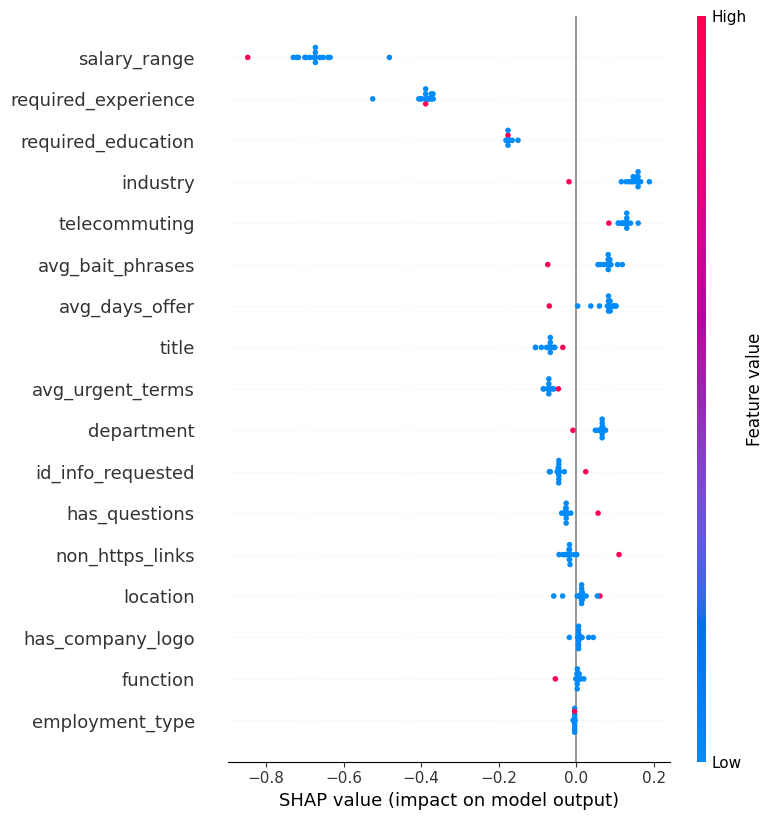

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a TF-IDF vectorizer and transform the text data into numeric features.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Extract the feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()


background_data = X_train_tfidf[:100]   # Use a small subset for efficiency (adjust as needed)
explanation_data = X_test_tfidf[:100]     # Subset of test data for computing SHAP values

import shap
import matplotlib.pyplot as plt

# Assume the following models dictionary is defined and contains your trained models:
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb,
    'Logistic Regression': logreg,
    'SVM RBF': svm_rbf_model,
    'SVM Linear': svm_linear_model,
    'SVM Poly': svm_poly_model,
    'KNN': knn_model,
    'AdaBoost': ada_model,
    'XGBoost': xgb_model
}

# Identify which of these models are tree-based
# Note: We remove 'AdaBoost' from tree_models because scikit-learn's AdaBoostClassifier is not supported by TreeExplainer.
tree_models = ['Decision Tree', 'Random Forest', 'XGBoost']

# Loop through all models and generate SHAP explanations
for model_name, model in models.items():
    print("\nGenerating SHAP values for model:", model_name)

    try:
        # Use TreeExplainer for tree-based models if applicable
        if model_name in tree_models:
            explainer = shap.TreeExplainer(model)
        else:
            # For non-tree models or unsupported tree-based models (like AdaBoost), use KernelExplainer
            explainer = shap.KernelExplainer(model.predict, background_data)

        # Compute SHAP values for the explanation dataset
        shap_values = explainer.shap_values(explanation_data)

        # Create a summary plot for the model
        plt.title("SHAP Summary for " + model_name)
        shap.summary_plot(shap_values, explanation_data, feature_names=feature_names, show=True)

    except Exception as e:
        print(f"Error computing SHAP for {model_name}: {e}")






---



#KPIs

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


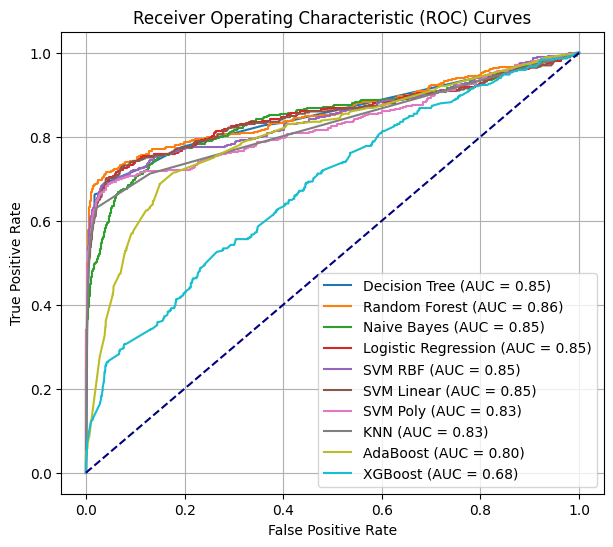

In [ ]:
from sklearn.metrics import roc_curve, auc

# Store the models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb,
    'Logistic Regression': logreg,
    'SVM RBF': svm_rbf_model,
    'SVM Linear': svm_linear_model,
    'SVM Poly': svm_poly_model,
    'KNN': knn_model,
    'AdaBoost': ada_model,
    'XGBoost': xgb_model
}

# Plot settings
plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    # Use scaled or unscaled test data depending on the model
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    # Get probability or decision function
    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            # Normalize decision_function output to [0, 1] for ROC
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue  # Skip models that can't produce a score
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Final plot touches
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


---
#Fine-tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [5, 10],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)
cm_grid_rf = confusion_matrix(y_test, grid_rf.predict(X_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.7396507600038387


In [ ]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1]
}


xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1',  # or 'roc_auc', 'accuracy', etc.
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)

cm_grid_xgb = confusion_matrix(y_test, grid_xgb.predict(X_test))
print("Best Params:", grid_xgb.best_params_)
print("Best F1 Score:", grid_xgb.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.7419714280856164


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Param grid for AdaBoost
param_grid_ada = {
    'n_estimators': [100, 200],
    'learning_rate': [0.5, 1.0],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=3)
    ]
}

# Initialize GridSearchCV
grid_ada = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid_ada,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_ada.fit(X_train, y_train)

cm_grid_ada = confusion_matrix(y_test, grid_ada.predict(X_test))

print("Best AdaBoost Params:", grid_ada.best_params_)
print("Best F1 Score:", grid_ada.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best AdaBoost Params: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200}
Best F1 Score: 0.6890020610793712


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


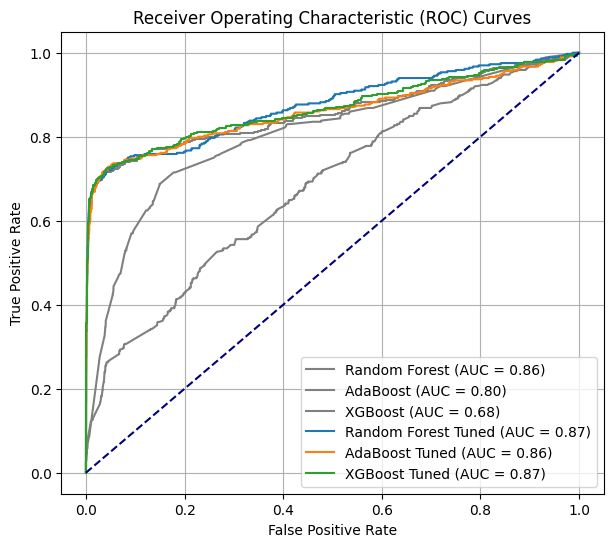

In [ ]:
models = {
    'Random Forest': rf_model,
    'AdaBoost': ada_model,
    'XGBoost': xgb_model,
    'Random Forest Tuned': grid_rf,
    'AdaBoost Tuned': grid_ada,
    'XGBoost Tuned': grid_xgb

}

plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    if model_name in ['Random Forest', 'XGBoost', 'AdaBoost']:
        color = 'grey'
    else:
        color = None

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
    estimators=[
        ('rf', grid_rf),
        ('xgb', grid_xgb),
        ('svm_rbf', svm_rbf_model),
        ('svm_linear', svm_linear_model),
        ('svm_poly', svm_poly_model),
        ('knn', knn_model),
        ('ada', grid_ada),
        ('dt', dt_model),
        ('nb', nb),
        ('lr', logreg)
    ],
    voting='soft'  # Use 'soft' because your models can predict probabilities
)

voting_clf.fit(X_train_scaled, y_train)

y_pred_voting = voting_clf.predict(X_test_scaled)

voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")

cm_voting = confusion_matrix(y_test, y_pred_voting)
print(cm_voting)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:56:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Voting Classifier Accuracy: 0.9663
[[4972   27]
 [ 154  211]]


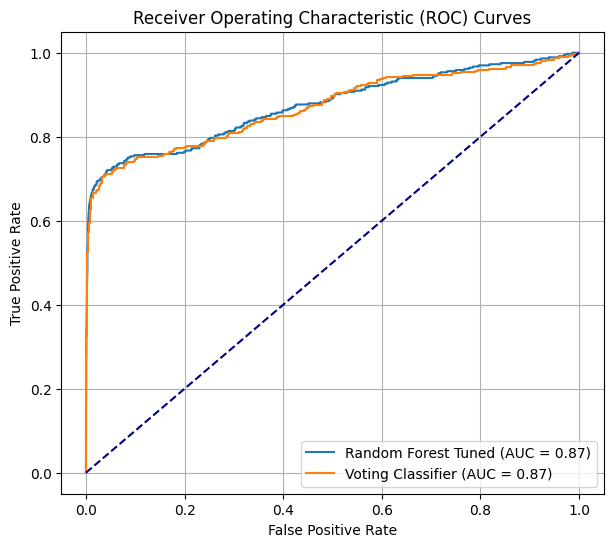

In [ ]:
models = {
    'Random Forest Tuned': grid_rf,
    'Voting Classifier': voting_clf
}

plt.figure(figsize=(7, 6))

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'KNN', 'Voting Classifier']:
        X_input = X_test_scaled
    else:
        X_input = X_test

    try:
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_input)[:, 1]
        elif hasattr(model, "decision_function"):
            decision_scores = model.decision_function(X_input)
            probas_ = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            continue
    except Exception as e:
        print(f"Error for {model_name}: {e}")
        continue

    fpr, tpr, _ = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)

    if model_name in ['Random Forest', 'XGBoost', 'AdaBoost', 'AdaBoost Tuned', 'XGBoost Tuned']:
        color = 'grey'
    else:
        color = None

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
)
import numpy as np
import pandas as pd

# Function to calculate all metrics from a confusion matrix
def evaluate_from_confusion_matrix(cm, average='binary'):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    y_true = np.array([1]*TP + [0]*TN + [0]*FP + [1]*FN)
    y_pred = np.array([1]*TP + [0]*TN + [1]*FP + [0]*FN)

    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average=average, zero_division=0),
        'F0.5 Score': fbeta_score(y_true, y_pred, beta=0.5, average=average, zero_division=0),
        'F2 Score': fbeta_score(y_true, y_pred, beta=2.0, average=average, zero_division=0),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

# All confusion matrices; add XGBoost's confusion matrix (cm_xgb) here:
conf_matrices = {
    "Decision Tree": cm_dt,
    "Random Forest": cm_grid_rf,
    "Naive Bayes": cm_nb,
    "Logistic Regression": cm_lr,
    "SVM RBF": cm_svm_rbf,
    "SVM Linear": cm_svm_linear,
    "SVM Poly": cm_svm_poly,
    "KNN": cm_knn,
    "AdaBoost": cm_grid_ada,
    "XGBoost": cm_grid_xgb,
    "Voting Classifier": cm_voting
}

# Evaluate and compile results into a DataFrame
results = {model: evaluate_from_confusion_matrix(cm) for model, cm in conf_matrices.items()}
results_df = pd.DataFrame(results).T.round(4)

print(results_df)

                     Accuracy  Precision  Recall  F1 Score  F0.5 Score  \
Decision Tree          0.9627     0.8452  0.5534    0.6689      0.7646   
Random Forest          0.9683     0.8520  0.6466    0.7352      0.8011   
Naive Bayes            0.9271     0.4733  0.6301    0.5405      0.4981   
Logistic Regression    0.9614     0.8692  0.5096    0.6425      0.7617   
SVM RBF                0.9640     0.8909  0.5370    0.6701      0.7871   
SVM Linear             0.9603     0.8585  0.4986    0.6308      0.7502   
SVM Poly               0.9633     0.8750  0.5370    0.6655      0.7772   
KNN                    0.9614     0.8160  0.5589    0.6634      0.7473   
AdaBoost               0.9657     0.8635  0.5890    0.7003      0.7899   
XGBoost                0.9694     0.8851  0.6329    0.7380      0.8197   
Voting Classifier      0.9663     0.8866  0.5781    0.6998      0.8011   

                     F2 Score     MCC   Kappa  
Decision Tree          0.5945  0.6664  0.6500  
Random Forest  

#Test with an example

In [ ]:
from math import nan
import pandas as pd
from sklearn.impute import KNNImputer

new_row_data = {
    'title': 7050,
    'location': 1642,
    'department': 812,
    'salary_range': 950,
    'telecommuting': 0,
    'has_company_logo': 1,
    'has_questions': 1,
    'employment_type': 1,
    'required_experience': 3,
    'required_education': 4,
    'industry': 120,
    'function': 30,
    'non_https_links': 0.0,
    'id_info_requested': 0.0,
    'avg_days_offer': 4,
    'avg_urgent_terms': 0,
    'avg_bait_phrases': 4
}

imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)


X_test_imputed = imputer.transform(X_test)
new_row_imputed = imputer.transform(X_test_imputed)

new_test_df = pd.DataFrame([new_row_data])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


In [ ]:
row_index = 0

#print(new_test_df)
test_row_scaled = scaler.transform(new_test_df)

predicted_class = grid_rf.predict(new_test_df)[0]
predicted_proba = rf_model.predict_proba(new_test_df)[0]

print(f"Predicted class: {predicted_class}")
print(f"Predicted probabilities: Legitimate = {predicted_proba[0]:.4f}, Fraudulent = {predicted_proba[1]:.4f}")


Predicted class: 0
Predicted probabilities: Legitimate = 0.7126, Fraudulent = 0.2874


# Export Model

In [ ]:
import joblib

# Save the GridSearchCV-tuned Random Forest model
joblib.dump(grid_rf, 'grid_rf_model.pkl')

print("Model saved as grid_rf_model.pkl")


Model saved as grid_rf_model.pkl
